In [15]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import tensorly as tl
import numpy as np

from utils import create_dyntex_tensor, visualise_dyntex, get_temporal_mean, sample, reconstruct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
path = "processed/Underconstrained_flicker/Underconstrained_flicker_g1_c28"
name = path.split("/")[-1]
rank = 100

In [48]:
t = create_dyntex_tensor(path)

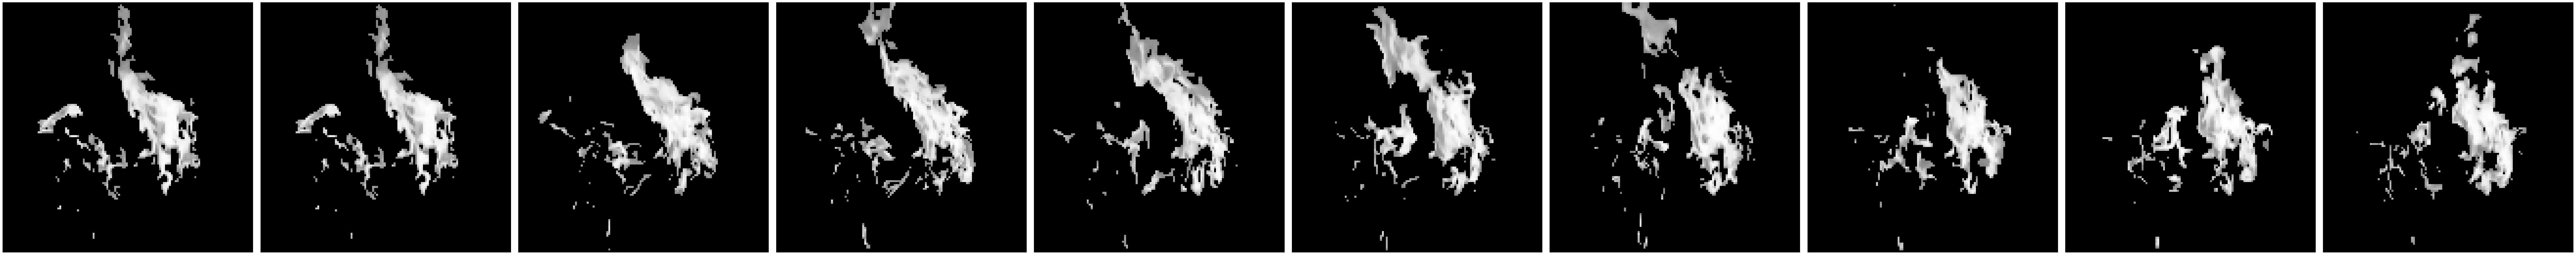

In [49]:
fig = visualise_dyntex(t, 0, 10)

fig.savefig(f"visuals/{name}_f10.png")
plt.show()

In [50]:
M = get_temporal_mean(t)
centered_t = t - M
hosvd = tl.decomposition.tucker(centered_t, rank=rank)

c:\ProgramData\miniconda3\envs\numerical\lib\site-packages\tensorly\tucker_tensor.py:432: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 3. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)


In [51]:
X = hosvd.factors[2]

P1 = X[:-1].T
P2 = X[1:].T

H = (P2 @ P1.T) @ np.linalg.inv(P1 @ P1.T)

In [52]:
residuals = P2 - H @ P1

# get the covariance matrix of the residuals
Q = residuals @ residuals.T / (residuals.shape[1])

G = np.linalg.cholesky(Q)

In [ ]:
"""
4   1.058e-5
28  1.690e-5
111 1.387e-5
"""

'\n111 1.387e-5\n4   1.058e-5\n28  1.690e-5\n'

In [76]:
np.mean(Q), np.max(Q)

(np.float64(1.6898935357656576e-05), np.float64(0.0025178984303816632))

In [71]:
np.random.seed(147391419)

# let's drive the system
x = sample(G)

frames = []

for i in range(100):
	frame = reconstruct(hosvd, x, M)
	frame = np.clip(frame, 0, 1)
	frames.append(frame)
	x = H @ x + sample(G)

In [72]:
tex = np.stack(frames, axis=2)

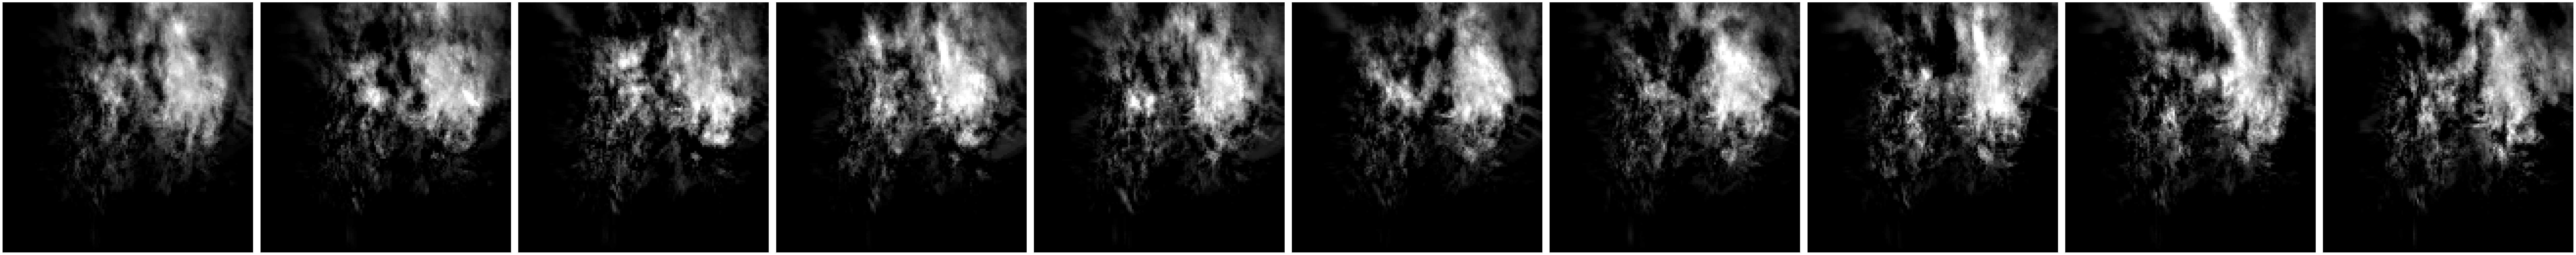

In [73]:
fig = visualise_dyntex(tex, 0, 10)
plt.show()

fig.savefig(f"visuals/{name}_s0_synth.png")

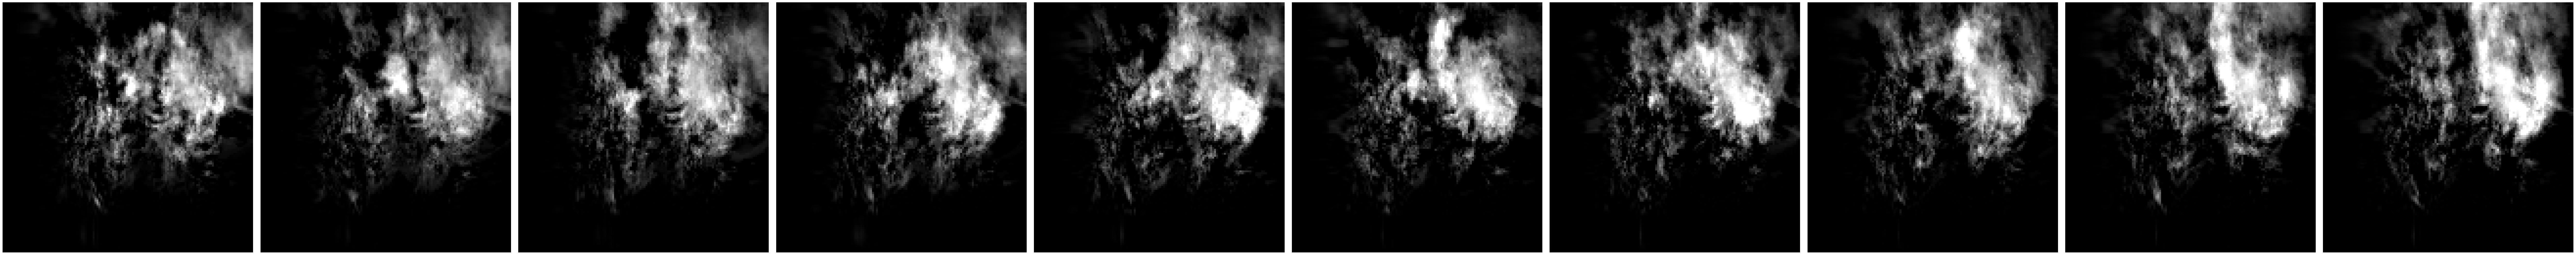

In [74]:
fig = visualise_dyntex(tex, 10, 10)
plt.show()

fig.savefig(f"visuals/{name}_s10_synth.png")

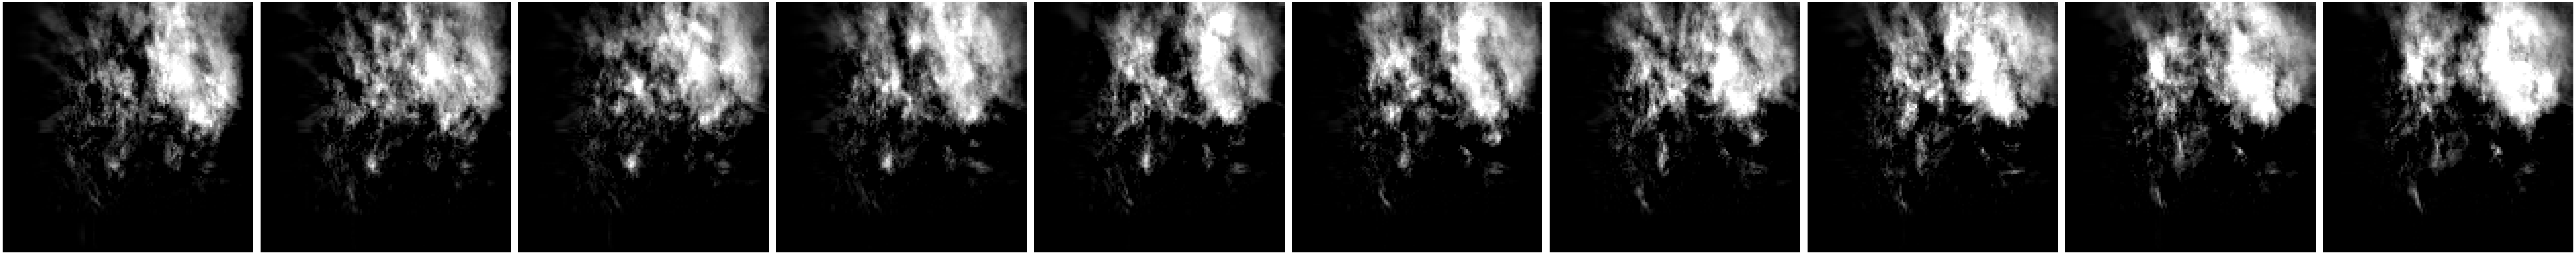

In [75]:
fig = visualise_dyntex(tex, 20, 10)
plt.show()

fig.savefig(f"visuals/{name}_s20_synth.png")